In [ ]:
import pandas as pd
df = pd.read_csv('Salary Data.csv')
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


# About Dataset

Link: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

Columns:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

** The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited
and this dataset was large language models generated and not collected from actual data sources.

# Data Profiling and inspection

In [ ]:
df.sample()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
122,33.0,Female,Bachelor's,Junior Operations Analyst,5.0,50000.0


In [ ]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:
df.shape # (no_of_rows, no_of_columns)

(375, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


* The data has 375 rows but each column has 373 not null rows. which means two rows are missing.

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [ ]:
df.isna().sum() # how many rows missing in each column?

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

<Axes: >

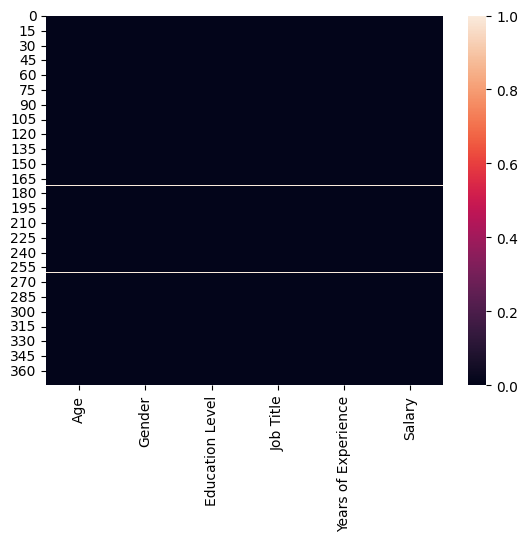

In [ ]:
import seaborn as sns
sns.heatmap(df.isna())

The above heatmap shows 2 entire rows are missing. Let's verify it.

In [ ]:
df.loc[df.isna().any(axis='columns')]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
df.describe(include='object')

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [ ]:
df['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

# EDA

In [ ]:
df.sample(4)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
100,31.0,Female,Bachelor's,Event Coordinator,5.0,45000.0
141,41.0,Female,Master's,Senior Marketing Manager,13.0,110000.0
96,47.0,Male,PhD,Research Scientist,22.0,160000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0


In [ ]:
# Analysing Age column: numerical continuous data - boxplot, histogram, kdeplot

<Axes: xlabel='Age', ylabel='Count'>

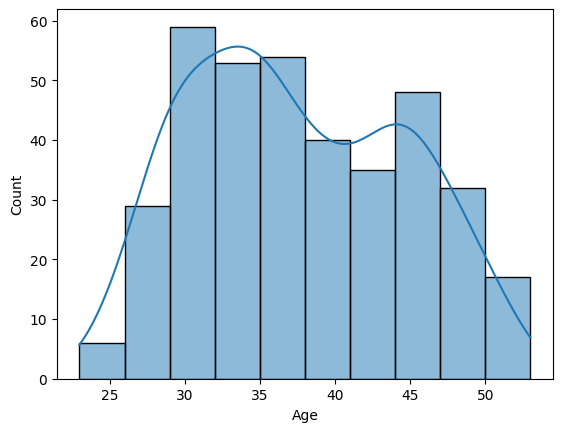

In [ ]:
sns.histplot(df['Age'], kde=True)

<Axes: ylabel='Years of Experience'>

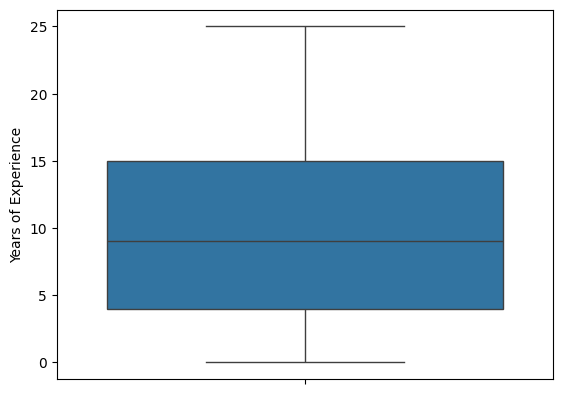

In [ ]:
sns.boxplot(df['Years of Experience'])

In [ ]:
# yo data ma equal male and female representation xa ki nai?

<Axes: xlabel='Gender', ylabel='count'>

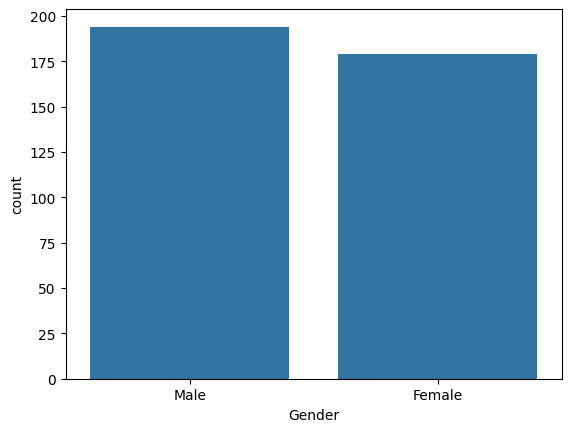

In [ ]:
sns.countplot(x=df['Gender']) # Male and Female data is almost same

<Axes: xlabel='Education Level', ylabel='count'>

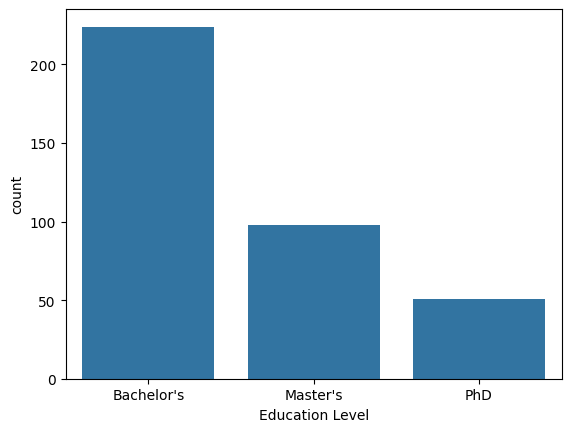

In [ ]:
sns.countplot(x=df['Education Level'])

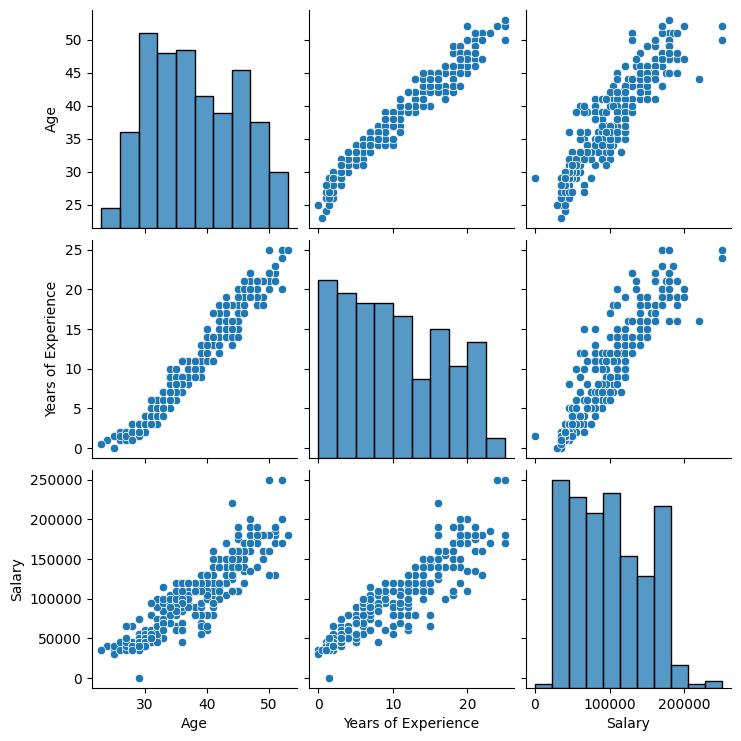

In [ ]:
sns.pairplot(df)

The above pairplot shows there is some realtionship between Age and Salary , and Years of experience and Salary. We can check this using correlation plot

<Axes: >

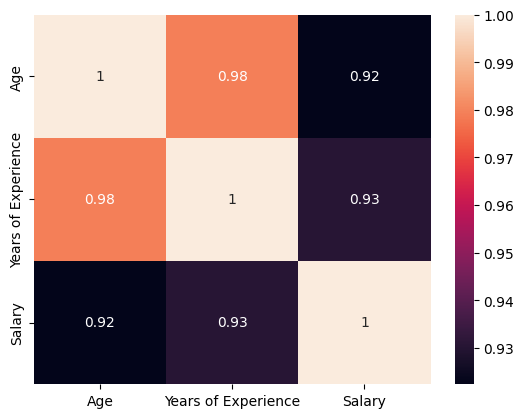

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* The above heatmap shows Salary is positively correlated with Age and Years of Experience with values 0.92 and 0.93 respectively.

* The plot also shows there is correlation between Age and Years of Experience.

* In our data we want to predict Salary using Age and Years of Experience. Hence Salary is a dependent variable and Age , Years of Experience is independent variable.

* The assumption of linear regression `Independence` states that the independent variable should not be correlated. In our case Years of Experience and Age are independent variable and they are correlated. This is a problem of multicolinarity. In such a case we have to drop one column.

* which one to drop? We should drop Age column because it is on readily available in inference time. It is easier to ask Years of experience instead of age./

<Axes: xlabel='Years of Experience', ylabel='Salary'>

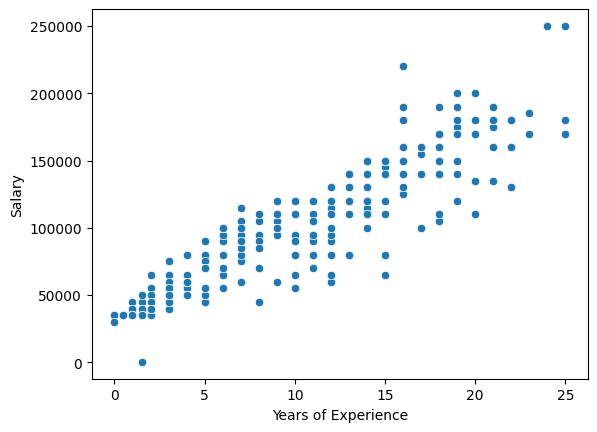

In [ ]:
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'])

# Feature Selection

* Based on correlation plot and Assumption of Linearity between Independent and Dependent variable we choose Years of Experience as X and Salary as y.

* Correlation is used to select feature in LinearRegression

# Assumptions of linear Regression



There are four assumptions associated with a linear regression model:

* Linearity: The relationship between X and  Y is linear.
* Homoscedasticity: The variance of residual is the same for any value of X.
* Independence: Observations are independent of each other.
* Normality: For any fixed value of X, Y is normally distributed.


Before doing ML we should handle missing data

# Missing data Handling

## Deletion
* row: if target or label(y) is missing; if entire row is missing we drop the row

* column: If a column contains >70% data missing we drop column.


## Imputation (fill in missing value):
* mean: data (column) has no outliers and normally distributed --use mean to fill in missing data

* median: if data(column) has outlier use median to fill in missing data


* mode: if data(column) is categorical and data is  missing we use mode to fill in missing data.

## Mathematical Technique
* Interpolation and Extrapolation

## Algorithms
* MICE
* IterativeImputer
* LinearRegression
* RandomForest
* KNN

## EDA and Domain knowledge


In our case entire row is missing so we drop the rows.

In [ ]:
df.dropna(inplace=True) # drop missing rows

In [ ]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Independent and Dependent variable

$salary = \beta_0 + \beta_1 . \text{yoe}$

or

$y = \beta_0 + \beta_1 X$

In [ ]:
X = df.loc[:, ['Years of Experience']]  # X sadhai 2D or DataFrame or matrix ma hunxa
y = df.Salary                           # y sadhai 1D or Series or 1D array ma hunxa

# Train test split

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg">

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

# Evaluate

In [ ]:
accuracy = model.score(X_test, y_test)
accuracy

0.8991338517367767

In [ ]:
y_pred = model.predict(X_test) # predict X_test to evaluate model on unseen data

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

241834883.8999349

In [ ]:
# classwork find  MAE and r2_score

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"mae = {mae}")
print(f"r2_score = {r2}") # r2 and accuracy is same

mae = 12094.170341194764
r2_score = 0.8991338517367767


In [ ]:
# Learned parameters/

In [ ]:
beta0 = model.intercept_
beta1 = model.coef_

In [ ]:
beta0

31521.077620206008

In [ ]:
beta1

array([6822.59017499])

In [ ]:
# Best fit line

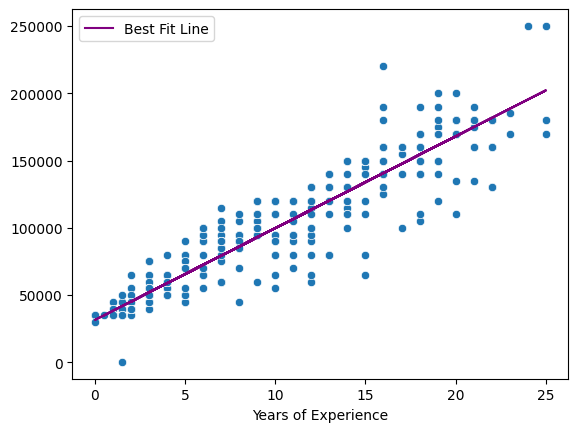

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=X['Years of Experience'], y=y.values)
plt.plot(X_test, y_pred, color='purple', label = "Best Fit Line")
plt.legend()
plt.show()

# pickle — Python object serialization

The pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” [1] or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.

In [ ]:
import pickle
file = open('salary_model.pickle', 'wb')
pickle.dump(model,file)
file.close()

# Multiple Linear Regression

In [ ]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


# Is there any difference between Gender's  Salary.

<Axes: xlabel='Salary', ylabel='Density'>

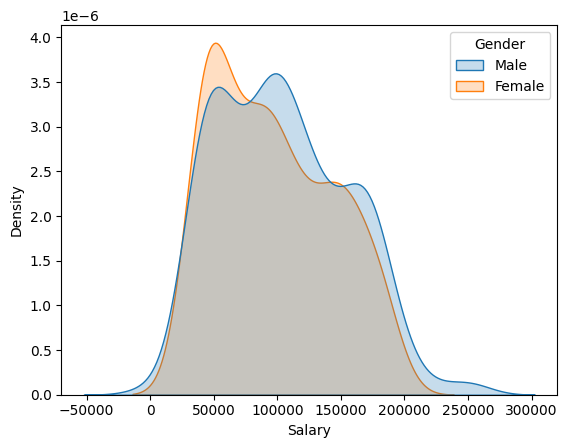

In [ ]:
sns.kdeplot(x=df['Salary'], hue = df['Gender'], fill=True)

The given kdeplot shows there is not much difference in salary of Male and Female. So Gender might not be a good variable to predict salary.

# Is there any relatioship between Salaries of Different Education Level

<Axes: ylabel='Salary'>

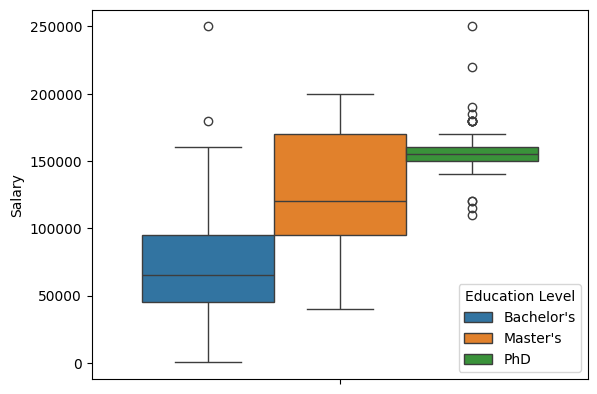

In [ ]:
sns.boxplot(y=df['Salary'], hue = df['Education Level'])

The above boxplot shows Education Level affects the Salary. Therefore we can take education level as another Indpendent variable

In [ ]:
X = df.loc[:, ['Years of Experience', 'Education Level']]
y = df.Salary

In [ ]:
X.head(2)

,Years of Experience,Education Level
0,5.0,Bachelor's
1,3.0,Master's


# Converting categorical data to Numerical using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['Education Level'] = encoder.fit_transform(X['Education Level'])

In [ ]:
X.head(2)

,Years of Experience,Education Level
0,5.0,0
1,3.0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test)# 90% accuracy : better than previous model

0.9023986325841762

In [ ]:
 from sklearn.metrics import mean_squared_error
 y_pred = model.predict(X_test)
 mean_squared_error(y_true=y_test, y_pred=y_pred) # lower MSE than previous model; Better model

234007303.38075846

# Use OneHotEncoder with Sklearn Pipeline

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Salary Data.csv')
df.dropna(inplace=True)

In [ ]:
X = df.loc[:, ['Years of Experience', 'Education Level']]  # X sadhai 2D or DataFrame or matrix ma hunxa
y = df.Salary                           # y sadhai 1D or Series or 1D array ma hunxa

In [ ]:
X.head()

,Years of Experience,Education Level
0,5.0,Bachelor's
1,3.0,Master's
2,15.0,PhD
3,7.0,Bachelor's
4,20.0,Master's


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Education Level'])

# One-hot encoding (handle_unknown='ignore')
# Define the columns that need one-hot encoding, e.g., 'Education Level' and other categorical columns
categorical_columns = ['Education Level']  # add other categorical columns if needed

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Keep the other non-categorical columns as is
)

# Create a pipeline with preprocessing and a regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 242871200.1692


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"mae = {mae}")
print(f"r2_score = {r2}") # r2 and accuracy is same

mae = 10519.062541801342
r2_score = 0.8789581892729801


In [ ]:
dummy_input_test = pd.DataFrame([{'Years of Experience': 5, "Education Level": 'PhD'}])
model.predict(dummy_input_test)

array([84900.59315017])

In [ ]:
dummy_input_test = pd.DataFrame([{'Years of Experience': 5, "Education Level": '+2'}])   # +2 is not on the data ; it works
model.predict(dummy_input_test)

array([75489.12795061])

In [ ]:
df['Education Level'].unique() # No data for +2

array(["Bachelor's", "Master's", 'PhD'], dtype=object)